In [17]:
import tal
import numpy as np

# data_mitsuba2 = tal.io.read_capture('/media/pleiades/vault/projects/202110-nlos-render/mitsuba3-transient/mitsuba3-transient/test/t-compare-with-mitsuba2/tal_Z/20230522-150700/tal_Z.hdf5')
data_mitsuba2 = tal.io.read_capture('/home/droyo/Downloads/Z_l[0.00,-1.00,0.00]_r[1.57,0.00,3.14]_v[0.81,0.01,0.81]_s[256]_l[1]_gs[1.00].hdf5')
data_mitsuba2.downscale(4)
data_mitsuba2.H = data_mitsuba2.H.reshape((1024, 4, 64, 64)).sum(axis=1)
data_mitsuba2.delta_t *= 4
print(data_mitsuba2.delta_t)

H_mitsuba3 = np.load('img_transient.npy')
print(data_mitsuba2.H.shape)
print(H_mitsuba3.shape)

Downscaled from 256x256 to 64x64
0.012000000104308128
(1024, 64, 64)
(64, 64, 1024, 3)


tal.reconstruct.utils: Assuming that volume_xyz is X_Y_Z_3
tal.reconstruct.utils: Optimizing for convolutions. Other algorithms (e.g. tal.reconstruct.pf_dev) should also log that it is being used.
tal.reconstruct.pf_dev: Using wavelengths from 0.0665m to 0.2012m


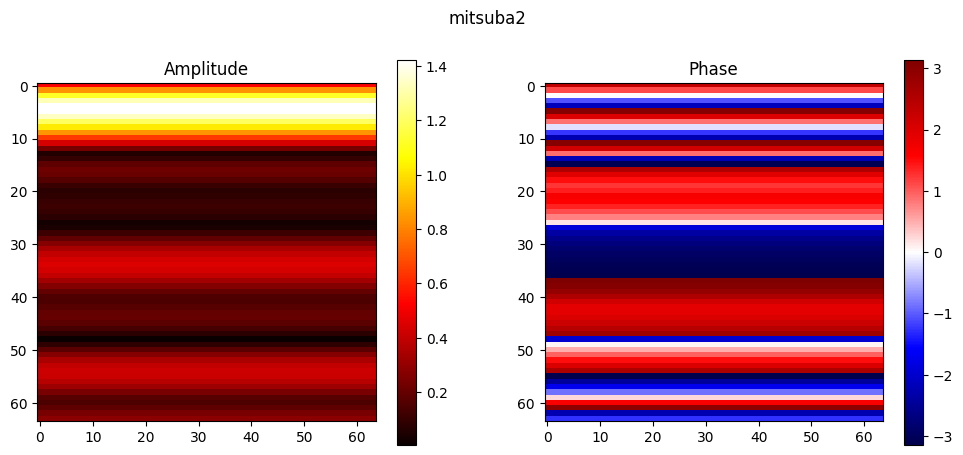

In [18]:
volume_xyz = tal.reconstruct.get_volume_project_rw(data_mitsuba2, depths=[1.0,])

H_1 = tal.reconstruct.pf_dev.solve(data_mitsuba2, wl_mean=0.1, wl_sigma=0.1, volume_xyz=volume_xyz, camera_system=tal.enums.CameraSystem.DIRECT_LIGHT)

tal.plot.amplitude_phase(H_1, title='mitsuba2')

(1024, 64, 64)
tal.reconstruct.utils: Assuming that volume_xyz is X_Y_Z_3
tal.reconstruct.utils: Optimizing for convolutions. Other algorithms (e.g. tal.reconstruct.pf_dev) should also log that it is being used.
tal.reconstruct.pf_dev: Using wavelengths from 0.0665m to 0.2012m


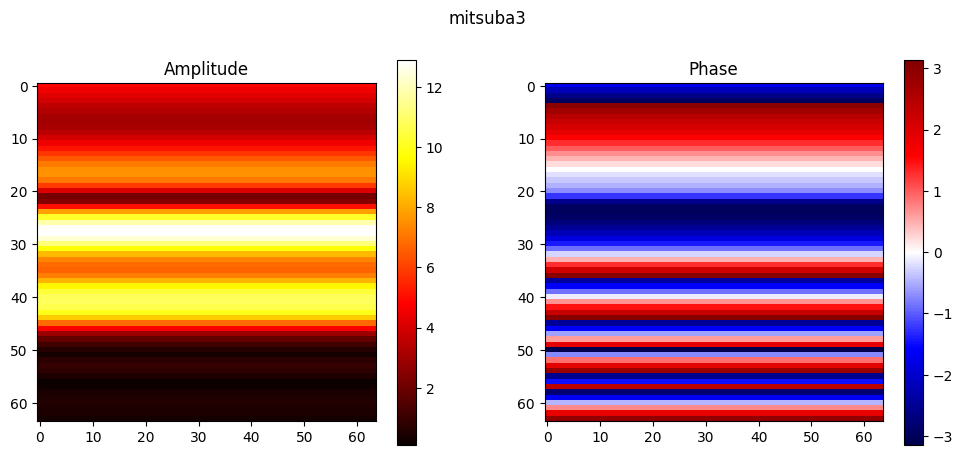

In [19]:
data_mitsuba2.H = H_mitsuba3[:, :, :, 0].transpose(2, 0, 1)

print(data_mitsuba2.H.shape)

H_1 = tal.reconstruct.pf_dev.solve(data_mitsuba2, wl_mean=0.1, wl_sigma=0.1, volume_xyz=volume_xyz, camera_system=tal.enums.CameraSystem.DIRECT_LIGHT)

tal.plot.amplitude_phase(H_1, title='mitsuba3')